In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

In [2]:
df = pd.read_csv("datasets/picks_data.csv")

heros = {}

with open("datasets/heros.json") as hero_ids:
    heros_json = json.load(hero_ids)

for hero in heros_json:
    heros[hero['id']] = hero['name']

In [3]:
df.head()

,loosing_hero_id_1,loosing_hero_id_2,loosing_hero_id_3,loosing_hero_id_4,loosing_hero_id_5,winning_hero_id_1,winning_hero_id_2,winning_hero_id_3,winning_hero_id_4,winning_hero_id_5
0,18,28,43,75,84,60,71,74,87,93
1,47,72,78,86,107,11,12,30,38,51
2,21,51,65,71,73,13,63,66,80,89
3,11,26,83,93,110,8,22,33,90,97
4,15,16,21,26,99,7,11,47,93,102


In [4]:
losers = df.iloc[:,:5]
winners = df.iloc[:,5:]

In [5]:
losers_flattened = losers.to_numpy().flatten()
winners_flattened = winners.to_numpy().flatten()

In [6]:
unique_losers, count_losers = np.unique(losers_flattened, return_counts=True)
unique_winners, count_winners = np.unique(winners_flattened, return_counts=True)

In [7]:
np.all(unique_losers == unique_winners)

True

In [8]:
data = pd.DataFrame()
data['id'] = unique_losers
data['hero'] = [heros[i] for i in unique_losers]
data['wins'] = count_winners
data['losses'] = count_losers
data['total games'] = data['wins'] + data['losses']
data['popularity'] = data['total games']/df.shape[0]
data['win rate'] = data['wins']/data['total games']
data.head()

,id,hero,wins,losses,total games,popularity,win rate
0,1,antimage,2485,2574,5059,0.070820,0.491204
1,2,axe,3094,3375,6469,0.090558,0.478281
2,3,bane,3086,3070,6156,0.086176,0.501300
3,4,bloodseeker,1290,1388,2678,0.037489,0.481703
4,5,crystal_maiden,3784,3616,7400,0.103591,0.511351


Getting the most picked heros gives an insight into the perceived strength of the hero

<AxesSubplot:title={'center':'Top 20 heros by popularity'}, xlabel='popularity', ylabel='hero'>

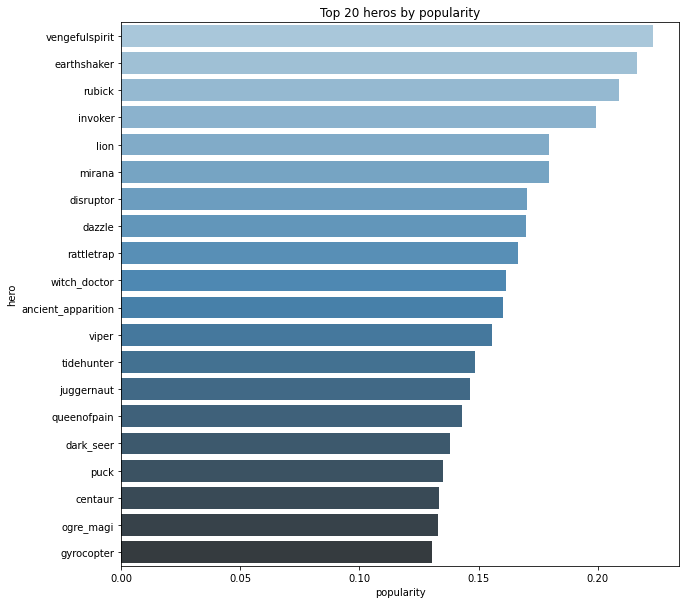

In [9]:
plt.figure(figsize=(10,10))
plt.title("Top 20 heros by popularity")
sns.barplot(x='popularity', y='hero', palette='Blues_d', data=data.sort_values(by=['popularity'], ascending=False).iloc[0:20])

<AxesSubplot:title={'center':'Top 20 heros by win rate'}, xlabel='win rate', ylabel='hero'>

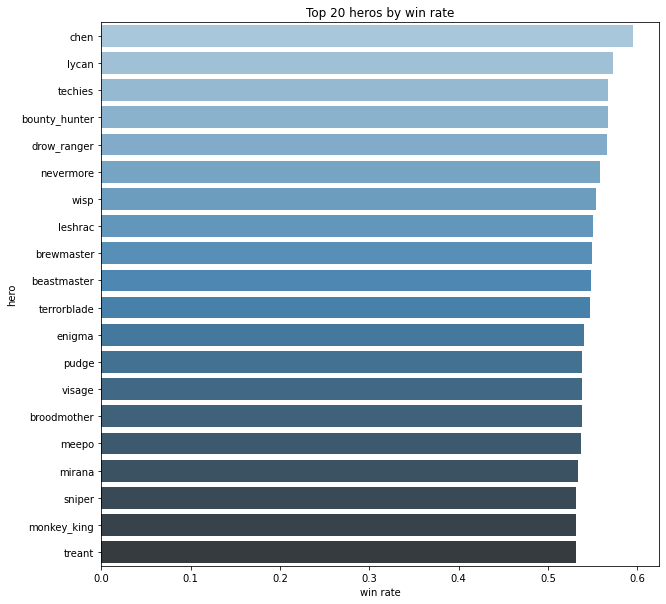

In [10]:
plt.figure(figsize=(10,10))
plt.title("Top 20 heros by win rate")
sns.barplot(x='win rate', y='hero', palette='Blues_d', data=data.sort_values(by=['win rate'], ascending=False).iloc[0:20])

<AxesSubplot:title={'center':'Correlation matrix'}>

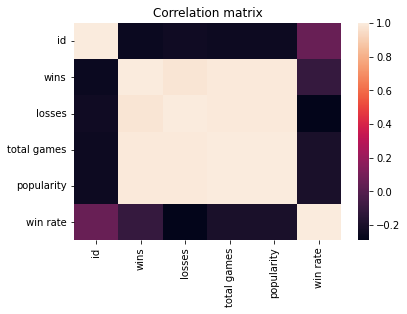

In [11]:
plt.title("Correlation matrix")
sns.heatmap(data.corr())

In [12]:
stats.pearsonr(data['popularity'], data['win rate'])

(-0.20070485321770554, 0.03304469711580285)

Based on the Pearson correlation coefficient, we can see that there is a small negative correlation between the hero pick rates (popularity) and the win rate of the hero. This leads us to believe that picking the most popular heros doesn't necessarily add to the win probability. Win rate depends more on the skill of the player and picking the correct counter for the opponent's roster.

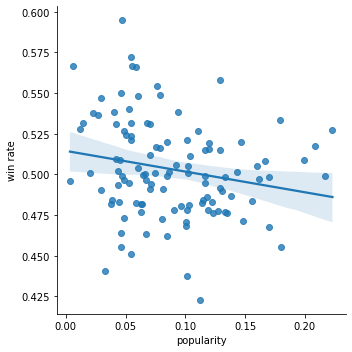

In [13]:
sns.lmplot(x="popularity", y="win rate", data=data)

**Getting teams that won the most rounds**

In [53]:
# Restructure dataset and add a win status for each team composition
winners_team = winners.rename(columns = {'winning_hero_id_1': 'hero_1', 'winning_hero_id_2': 'hero_2', 'winning_hero_id_3': 'hero_3', 'winning_hero_id_4': 'hero_4', 'winning_hero_id_5': 'hero_5'})
winners_team['win'] = 1
losers_team = losers.rename(columns = {'loosing_hero_id_1': 'hero_1', 'loosing_hero_id_2': 'hero_2', 'loosing_hero_id_3': 'hero_3', 'loosing_hero_id_4': 'hero_4', 'loosing_hero_id_5': 'hero_5'})
losers_team['win'] = 0
teams = pd.DataFrame(columns=['hero_1', 'hero_2', 'hero_3', 'hero_4', 'hero_5', 'win'])
teams = pd.concat([teams, winners_team, losers_team])
teams.head()

,hero_1,hero_2,hero_3,hero_4,hero_5,win
0,60,71,74,87,93,1
1,11,12,30,38,51,1
2,13,63,66,80,89,1
3,8,22,33,90,97,1
4,7,11,47,93,102,1


In [54]:
teams = teams.astype('int32')

In [57]:
teams_cumulative = teams.groupby(teams.columns.to_list(), as_index=False).size()

In [82]:
winners_cumulative = teams_cumulative[(teams_cumulative['size'] > 1) & (teams_cumulative['win'] == 1)].rename(columns={'size':'wins'})
top_10_teams = winners_cumulative.sort_values(by='wins', ascending=False)[:10].drop(['win'], axis=1)

**Top 10 team compositions based on wins**

In [83]:
top_10_teams_names = top_10_teams.replace({"hero_1": heros, "hero_2": heros, "hero_3": heros, "hero_4": heros ,"hero_5": heros})
top_10_teams_names

,hero_1,hero_2,hero_3,hero_4,hero_5,wins
94155,vengefulspirit,witch_doctor,beastmaster,luna,lycan,6
66195,nevermore,dark_seer,spirit_breaker,gyrocopter,winter_wyvern,4
129420,faceless_void,rattletrap,ancient_apparition,invoker,nyx_assassin,4
24870,crystal_maiden,pugna,dragon_knight,furion,abaddon,4
53112,mirana,tiny,batrider,treant,wisp,4
114654,slardar,dazzle,night_stalker,abaddon,elder_titan,4
46716,juggernaut,lion,tidehunter,tinker,skywrath_mage,3
122513,enigma,templar_assassin,luna,dark_seer,rubick,3
32632,earthshaker,nevermore,rattletrap,gyrocopter,disruptor,3
61832,nevermore,puck,night_stalker,jakiro,troll_warlord,3


**Fitting a linear and KNN classifier to predict win/loss based on team composition**

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = teams.drop('win', axis=1)
y = teams['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
clf = LogisticRegression(solver='lbfgs', random_state=6220).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5032547070763631

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.5034880194115863

We can see that the dataset isn't really structured to help classification.